

# Import helpful libraries


In [18]:
# Import useful libraries
# For model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

# Data preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, 

# Plottting lib
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data


In [19]:
# Loading the data
data = pd.read_csv("Datasets/Life Expectancy Data.csv")

# Preview the data
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [20]:
# Subset for developing countries
le_dev_country_data = data.loc[data['Status'] == 'Developing']
# First five
le_dev_country_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [21]:
# Selecting interesting variables
cols = ['Life expectancy ', 'Adult Mortality',' BMI ', ' HIV/AIDS', 
       'Income composition of resources', 'Schooling']
# New dataframe with selected variables
le_dev_country_data = le_dev_country_data[cols]

In [22]:
le_dev_country_data.shape

(2426, 6)

In [23]:
# renaming columns
le_dev_country_data = le_dev_country_data.rename(columns={'Life expectancy ':'life_expectancy', 
                                                          'Adult Mortality':'adult_mortality',
                                                          ' BMI ':'bmi', 
                                                          ' HIV/AIDS':'hiv_aids', 
                                                          'Income composition of resources':'income_comp_res', 
                                                          'Schooling':'schooling'})
le_dev_country_data.head()

,life_expectancy,adult_mortality,bmi,hiv_aids,income_comp_res,schooling
0,65.0,263.0,19.1,0.1,0.479,10.1
1,59.9,271.0,18.6,0.1,0.476,10.0
2,59.9,268.0,18.1,0.1,0.470,9.9
3,59.5,272.0,17.6,0.1,0.463,9.8
4,59.2,275.0,17.2,0.1,0.454,9.5


# Step 1: EDA


In [24]:
# print a summary description
le_dev_country_data.describe()

,life_expectancy,adult_mortality,bmi,hiv_aids,income_comp_res,schooling
count,2416.000000,2416.000000,2392.000000,2426.000000,2307.000000,2311.000000
mean,67.111465,182.833195,35.435326,2.088664,0.582310,11.219256
std,9.006092,127.974557,19.425091,5.526145,0.201597,3.056601
min,36.300000,1.000000,1.000000,0.100000,0.000000,0.000000
25%,61.100000,92.000000,18.300000,0.100000,0.466500,9.600000
50%,69.000000,163.000000,35.200000,0.100000,0.631000,11.700000
75%,74.000000,253.000000,53.200000,1.400000,0.727000,13.200000
max,89.000000,723.000000,87.300000,50.600000,0.919000,18.300000


# Step 2: Data preparation (cleaning)

In [27]:
# Get names of columns with missing values
cols_with_missing = [col for col in le_dev_country_data.columns
                     if le_dev_country_data[col].isnull().any()]
print(cols_with_missing)

['life_expectancy', 'adult_mortality', 'bmi', 'income_comp_res', 'schooling']


In [28]:
# Imputation
my_imputer = SimpleImputer()
imputed_dataset = pd.DataFrame(my_imputer.fit_transform(le_dev_country_data))

# Imputation removed column names; put them back
imputed_dataset.columns = le_dev_country_data.columns
imputed_dataset.describe()

,life_expectancy,adult_mortality,bmi,hiv_aids,income_comp_res,schooling
count,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000
mean,67.111465,182.833195,35.435326,2.088664,0.582310,11.219256
std,8.987504,127.710419,19.288434,5.526145,0.196588,2.983245
min,36.300000,1.000000,1.000000,0.100000,0.000000,0.000000
25%,61.100000,92.250000,18.400000,0.100000,0.475000,9.700000
50%,69.000000,164.000000,35.435326,0.100000,0.618000,11.600000
75%,74.000000,252.750000,53.075000,1.400000,0.722000,13.100000
max,89.000000,723.000000,87.300000,50.600000,0.919000,18.300000


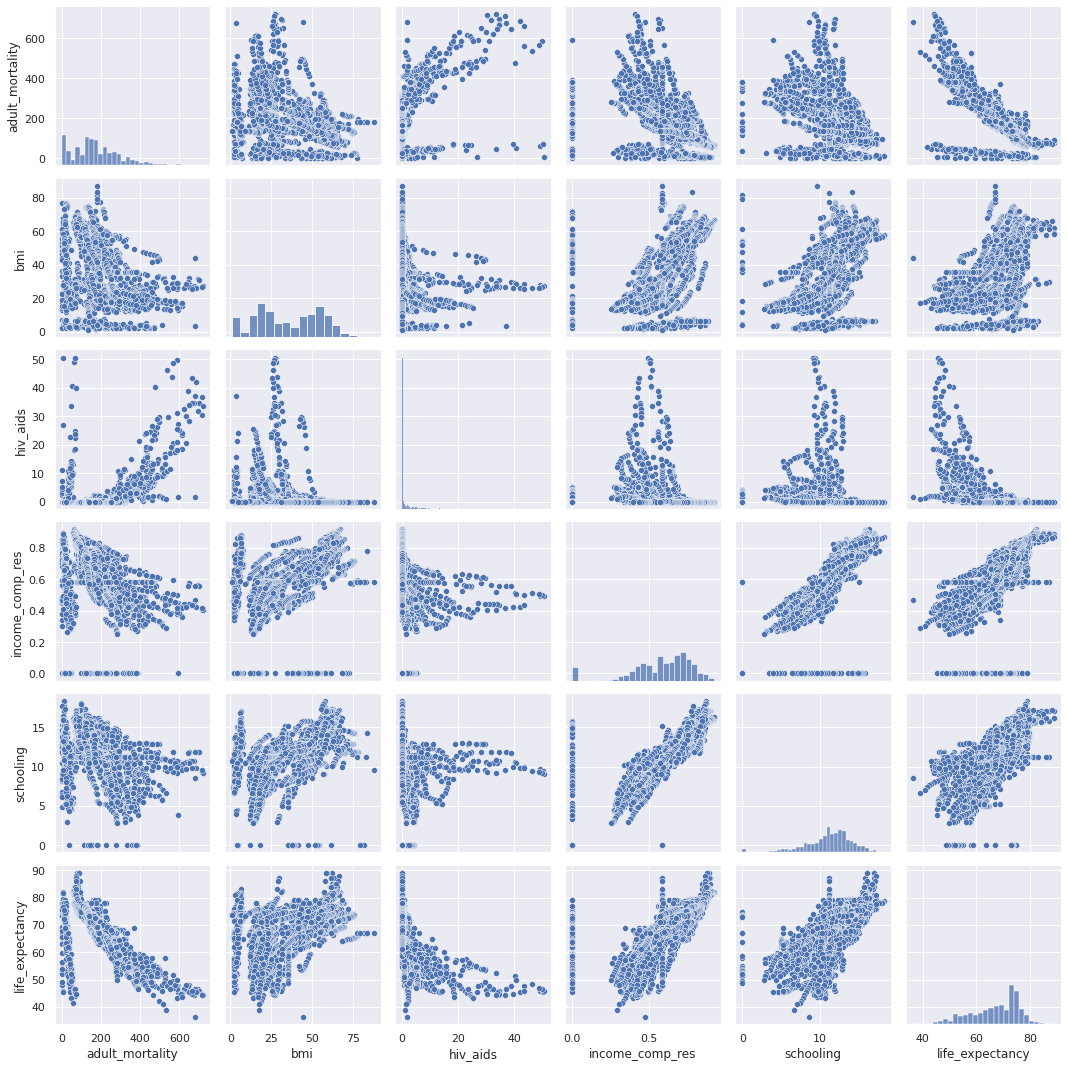

In [34]:
# Visualization of data distributions of the insurance dataset varialbes
# scatterplot matrix to visualize pair-wise correlations between features
cols = ['adult_mortality',
       'bmi','hiv_aids', 'income_comp_res', 'schooling', 'life_expectancy']#['age', 'bmi', 'children', 'charges']
sns.pairplot(imputed_dataset[cols], height=2.5)
plt.tight_layout()
plt.show()

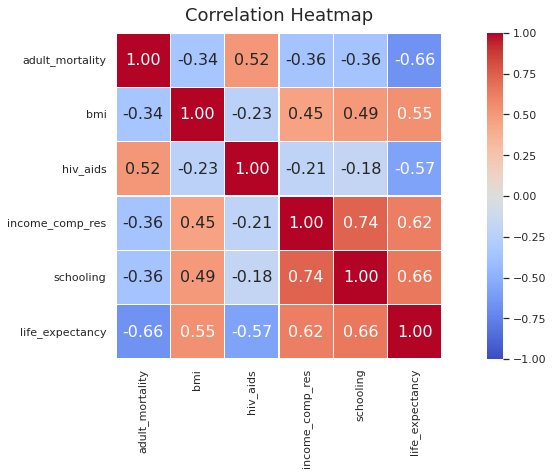

In [33]:
# Visualizing correlation matrix
sns.set_theme()
plt.figure(figsize=(16, 6))
cm = np.corrcoef(imputed_dataset[cols].values.T)
heatmap = sns.heatmap(cm, vmin=-1, vmax=1, cbar=True, annot=True,square=True,
                      linewidths = .5,
                fmt='.2f', annot_kws={'size': 16},yticklabels=cols,
                xticklabels=cols,cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.show()

In [29]:
# Train test split
training_data = imputed_dataset.sample(frac=0.8, random_state=25)
testing_data = imputed_dataset.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 1941
No. of testing examples: 485


In [30]:
# Remove target variable from test data
testing_data.drop(['life_expectancy'], axis=1, inplace=True)


In [31]:
# Preview test data
testing_data.head()

,adult_mortality,bmi,hiv_aids,income_comp_res,schooling
2,268.0,18.1,0.1,0.470,9.9
10,291.0,14.2,0.1,0.396,7.9
14,316.0,12.6,0.1,0.340,5.9
20,88.0,55.1,0.1,0.738,13.3
22,91.0,53.5,0.1,0.721,12.2


In [32]:
# Saving training set in csv
#training_data.to_csv('Datasets/train.csv', index=False)
# Saving test set in csv
#testing_data.to_csv('Datasets/test.csv', index=False)